In [287]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [288]:
%cd /content/drive/My Drive/HW_CRM

/content/drive/My Drive/HW_CRM


In [289]:
!pip install mlxtend

In [290]:
!pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('/content/drive/My Drive/HW_CRM/font/K2D-Light.ttf')
mpl.rc('font', family='K2D')

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.4.2)


In [291]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from scipy.spatial.distance import cosine

# **Load Data**

In [292]:
df = pd.read_csv("Customer Preference Survey.csv")
df.head()

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,2564/03/20 11:29:58 ก่อนเที่ยง GMT+7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2564/03/20 11:33:10 ก่อนเที่ยง GMT+7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,กล้วยทอด,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2564/03/20 11:53:44 ก่อนเที่ยง GMT+7,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
3,2564/03/20 11:54:00 ก่อนเที่ยง GMT+7,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
4,2564/03/20 11:54:05 ก่อนเที่ยง GMT+7,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [293]:
df = df.iloc[2:,1:].reset_index(drop=True).copy()
df.head()

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [294]:
df.melt()['value'].value_counts(dropna=False)

ไม่เคย    1710
เคย       1090
NaN          6
Name: value, dtype: int64

In [295]:
df = df.dropna()
df.melt()['value'].value_counts(dropna=False)

ไม่เคย    1518
เคย        983
Name: value, dtype: int64

In [296]:
df.replace({'เคย': 1, 'ไม่เคย': 0}, inplace=True)
df.head()

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,1


In [297]:
df[['เครื่องย่อยเศษอาหาร', 'เครื่องย่อยเศษอาหาร.1']].corr()

,เครื่องย่อยเศษอาหาร,เครื่องย่อยเศษอาหาร.1
เครื่องย่อยเศษอาหาร,1.0,1.0
เครื่องย่อยเศษอาหาร.1,1.0,1.0


In [298]:
df.drop('เครื่องย่อยเศษอาหาร.1',axis=1, inplace=True)
df.describe().T.sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
ครีมกันแดด,41.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
กระเป๋า,41.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
ชาบู,41.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
โรตี,41.0,0.975610,0.156174,0.0,1.0,1.0,1.0,1.0
กะหรี่(ปั๊บ),41.0,0.951220,0.218085,0.0,1.0,1.0,1.0,1.0
เม็ดมะม่วงหิมพานต์,41.0,0.902439,0.300406,0.0,1.0,1.0,1.0,1.0
หมอนข้าง,41.0,0.878049,0.331295,0.0,1.0,1.0,1.0,1.0
Software ถูกลิขสิทธิ์,41.0,0.804878,0.401218,0.0,1.0,1.0,1.0,1.0
หมูแดดเดียว,41.0,0.804878,0.401218,0.0,1.0,1.0,1.0,1.0
แฟน ที่แปลว่าพัดลม,41.0,0.804878,0.401218,0.0,1.0,1.0,1.0,1.0


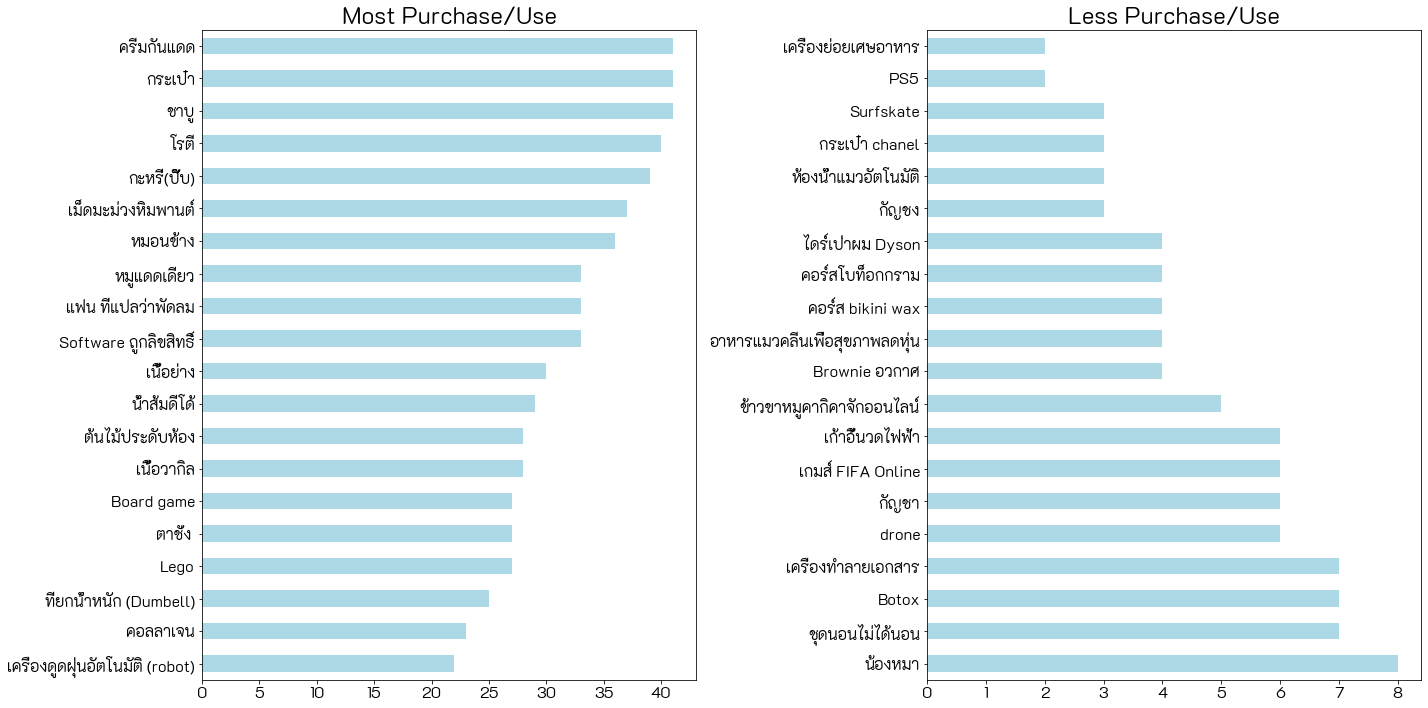

In [299]:
purchase = (df.sum().sort_values(ascending=False).to_frame().rename({0: 'count'}, axis=1))
most = purchase[:20]
less = purchase[-20:]

fig, axes = plt.subplots(1, 2, figsize=(20, 10), tight_layout=True)
most.sort_values('count', ascending=True).plot.barh(ax=axes[0], title='Most Purchase/Use', legend=False, color='lightblue')
less.plot.barh(ax=axes[1], title='Less Purchase/Use', legend=False, color='lightblue')
plt.rc('axes', titlesize=24)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.show()

# **Market Basket Analysis**

In [300]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
19642,"(เนื้อวากิล, ต้นไม้ประดับห้อง)","(เม็ดมะม่วงหิมพานต์, กะหรี่(ปั๊บ), โรตี)",0.512195,0.853659,0.512195,1.0,1.171429,0.074955,inf,2,3
20095,"(หมูแดดเดียว, ต้นไม้ประดับห้อง)","(เม็ดมะม่วงหิมพานต์, กะหรี่(ปั๊บ), โรตี)",0.585366,0.853659,0.585366,1.0,1.171429,0.085663,inf,2,3
20397,"(เนื้อย่าง, ต้นไม้ประดับห้อง)","(เม็ดมะม่วงหิมพานต์, กะหรี่(ปั๊บ), โรตี)",0.560976,0.853659,0.560976,1.0,1.171429,0.082094,inf,2,3
36353,"(Lego, หมูแดดเดียว)","(เม็ดมะม่วงหิมพานต์, กะหรี่(ปั๊บ), โรตี)",0.512195,0.853659,0.512195,1.0,1.171429,0.074955,inf,2,3
37781,"(เนื้อวากิล, แฟน ที่แปลว่าพัดลม)","(เม็ดมะม่วงหิมพานต์, กะหรี่(ปั๊บ), โรตี)",0.560976,0.853659,0.560976,1.0,1.171429,0.082094,inf,2,3
38834,"(เนื้อย่าง, แฟน ที่แปลว่าพัดลม)","(เม็ดมะม่วงหิมพานต์, กะหรี่(ปั๊บ), โรตี)",0.609756,0.853659,0.609756,1.0,1.171429,0.089233,inf,2,3
55258,"(หมูแดดเดียว, ต้นไม้ประดับห้อง, หมอนข้าง)","(เม็ดมะม่วงหิมพานต์, กะหรี่(ปั๊บ), โรตี)",0.560976,0.853659,0.560976,1.0,1.171429,0.082094,inf,3,3
55881,"(เนื้อย่าง, ต้นไม้ประดับห้อง, หมอนข้าง)","(เม็ดมะม่วงหิมพานต์, กะหรี่(ปั๊บ), โรตี)",0.512195,0.853659,0.512195,1.0,1.171429,0.074955,inf,3,3
61756,"(เนื้อวากิล, ต้นไม้ประดับห้อง, กระเป๋า)","(เม็ดมะม่วงหิมพานต์, กะหรี่(ปั๊บ), โรตี)",0.512195,0.853659,0.512195,1.0,1.171429,0.074955,inf,3,3
61781,"(เนื้อวากิล, ต้นไม้ประดับห้อง)","(เม็ดมะม่วงหิมพานต์, กะหรี่(ปั๊บ), โรตี, กระเป๋า)",0.512195,0.853659,0.512195,1.0,1.171429,0.074955,inf,2,4


In [332]:
one_item_rule = rules[ 
    (rules['antecedent_len'] == 1) &
    (rules['consequents_len'] == 1) &
    (rules['confidence'] >= 0.5) &
    (rules['lift'] >= 1.05) 
]
one_item_rule["antecedents"] = one_item_rule["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
one_item_rule["consequents"] = one_item_rule["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
one_item_rule = one_item_rule.sort_values('lift', ascending=False)
one_item_rule.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
161,เนื้อย่าง,เนื้อวากิล,0.731707,0.682927,0.658537,0.900000,1.317857,0.158834,3.170732,1,1
160,เนื้อวากิล,เนื้อย่าง,0.682927,0.731707,0.658537,0.964286,1.317857,0.158834,7.512195,1,1
17,ต้นไม้ประดับห้อง,Lego,0.682927,0.658537,0.560976,0.821429,1.247354,0.111243,1.912195,1,1
16,Lego,ต้นไม้ประดับห้อง,0.658537,0.682927,0.560976,0.851852,1.247354,0.111243,2.140244,1,1
75,Board game,ตาชั่ง,0.658537,0.658537,0.512195,0.777778,1.181070,0.078525,1.536585,1,1
74,ตาชั่ง,Board game,0.658537,0.658537,0.512195,0.777778,1.181070,0.078525,1.536585,1,1
25,เนื้อย่าง,ต้นไม้ประดับห้อง,0.731707,0.682927,0.560976,0.766667,1.122619,0.061273,1.358885,1,1
24,ต้นไม้ประดับห้อง,เนื้อย่าง,0.682927,0.731707,0.560976,0.821429,1.122619,0.061273,1.502439,1,1
104,Lego,เนื้อย่าง,0.658537,0.731707,0.536585,0.814815,1.113580,0.054729,1.448780,1,1
105,เนื้อย่าง,Lego,0.731707,0.658537,0.536585,0.733333,1.113580,0.054729,1.280488,1,1


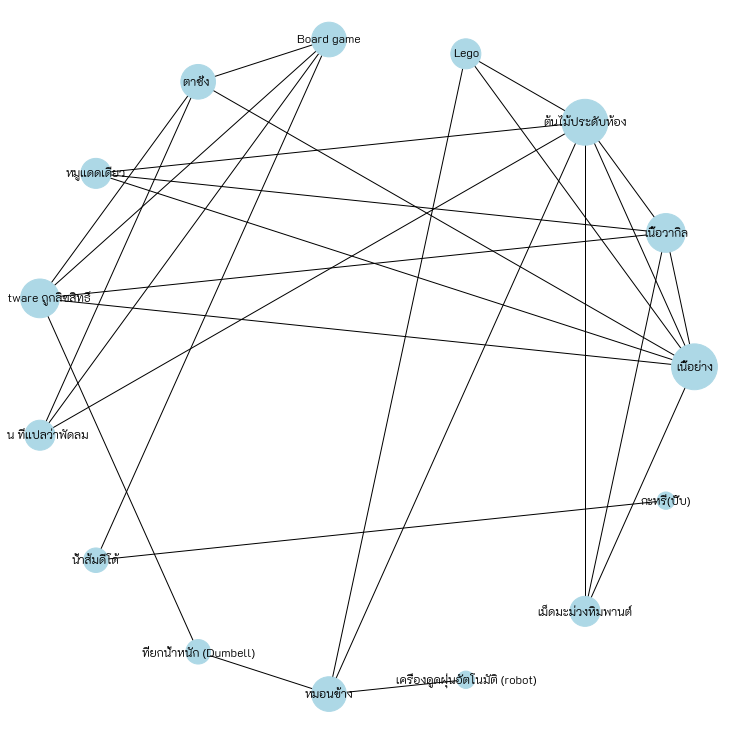

In [333]:
G = nx.from_pandas_edgelist(one_item_rule, source='antecedents', target='consequents', edge_attr='lift')
d = dict(G.degree)
nx.draw_circular(
    G, 
    node_size=[d[k] * 300 for k in dict(G.degree)], 
    with_labels=True, 
    font_family='K2D',
    node_color='lightblue'
) 
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

In [334]:
two_items_rule = rules[ 
    (rules['antecedent_len'] == 2) &
    (rules['consequents_len'] == 1) &
    (rules['confidence'] >= 0.5) &
    (rules['lift'] >= 1.3) 
]
two_items_rule["antecedents"] = two_items_rule["antecedents"].apply(lambda x: list(x)).astype("unicode")
two_items_rule["consequents"] = two_items_rule["consequents"].apply(lambda x: list(x)).astype("unicode")
two_items_rule = two_items_rule.sort_values('lift', ascending=False)
two_items_rule.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
2244,"['หมูแดดเดียว', 'เนื้อย่าง']",['เนื้อวากิล'],0.634146,0.682927,0.585366,0.923077,1.351648,0.152290,4.121951,2,1
2310,"['เนื้อย่าง', 'Software ถูกลิขสิทธิ์']",['เนื้อวากิล'],0.634146,0.682927,0.585366,0.923077,1.351648,0.152290,4.121951,2,1
2285,"['เนื้อวากิล', 'กระเป๋า']",['เนื้อย่าง'],0.682927,0.731707,0.658537,0.964286,1.317857,0.158834,7.512195,2,1
2286,"['เนื้อย่าง', 'กระเป๋า']",['เนื้อวากิล'],0.731707,0.682927,0.658537,0.900000,1.317857,0.158834,3.170732,2,1
2303,"['เนื้อวากิล', 'โรตี']",['เนื้อย่าง'],0.682927,0.731707,0.658537,0.964286,1.317857,0.158834,7.512195,2,1
2315,"['ครีมกันแดด', 'เนื้อวากิล']",['เนื้อย่าง'],0.682927,0.731707,0.658537,0.964286,1.317857,0.158834,7.512195,2,1
2314,"['ครีมกันแดด', 'เนื้อย่าง']",['เนื้อวากิล'],0.731707,0.682927,0.658537,0.900000,1.317857,0.158834,3.170732,2,1
2304,"['เนื้อย่าง', 'โรตี']",['เนื้อวากิล'],0.731707,0.682927,0.658537,0.900000,1.317857,0.158834,3.170732,2,1
2292,"['เนื้อย่าง', 'ชาบู']",['เนื้อวากิล'],0.731707,0.682927,0.658537,0.900000,1.317857,0.158834,3.170732,2,1
2291,"['เนื้อวากิล', 'ชาบู']",['เนื้อย่าง'],0.682927,0.731707,0.658537,0.964286,1.317857,0.158834,7.512195,2,1


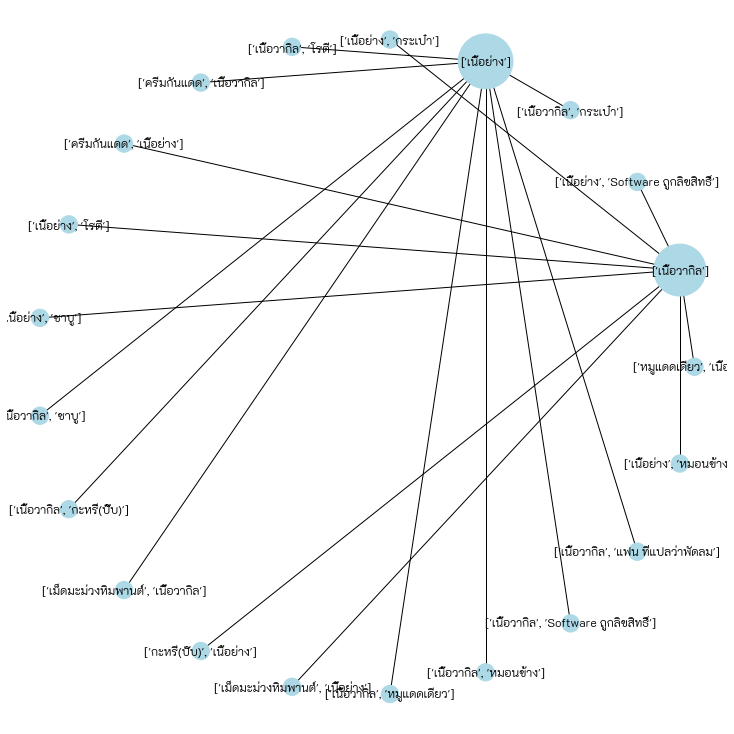

In [335]:
G = nx.from_pandas_edgelist(two_items_rule, source='antecedents', target='consequents')
d = dict(G.degree)
nx.draw_circular(
    G, 
    node_size=[d[k] * 300 for k in dict(G.degree)], 
    with_labels=True, 
    font_family='K2D',
    node_color='lightblue'
) 
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

In [324]:
three_items_rule = rules[ 
    (rules['antecedent_len'] == 3) &
    (rules['consequents_len'] == 1) &
    (rules['confidence'] > 0.9) &
    (rules['lift'] > 1.3) 
]
three_items_rule["antecedents"] = three_items_rule["antecedents"].apply(lambda x: list(x)).astype("unicode")
three_items_rule["consequents"] = three_items_rule["consequents"].apply(lambda x: list(x)).astype("unicode")
three_items_rule = three_items_rule.sort_values('lift', ascending=False)
three_items_rule.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
13833,"['หมูแดดเดียว', 'Software ถูกลิขสิทธิ์', 'เนื้...",['เนื้อวากิล'],0.536585,0.682927,0.512195,0.954545,1.397727,0.145747,6.975610,3,1
14169,"['เนื้อย่าง', 'Software ถูกลิขสิทธิ์', 'ชาบู']",['เนื้อวากิล'],0.634146,0.682927,0.585366,0.923077,1.351648,0.152290,4.121951,3,1
13777,"['หมูแดดเดียว', 'กระเป๋า', 'เนื้อย่าง']",['เนื้อวากิล'],0.634146,0.682927,0.585366,0.923077,1.351648,0.152290,4.121951,3,1
13791,"['หมูแดดเดียว', 'ชาบู', 'เนื้อย่าง']",['เนื้อวากิล'],0.634146,0.682927,0.585366,0.923077,1.351648,0.152290,4.121951,3,1
13803,"['เม็ดมะม่วงหิมพานต์', 'หมูแดดเดียว', 'เนื้อย่...",['เนื้อวากิล'],0.634146,0.682927,0.585366,0.923077,1.351648,0.152290,4.121951,3,1
13819,"['หมูแดดเดียว', 'โรตี', 'เนื้อย่าง']",['เนื้อวากิล'],0.634146,0.682927,0.585366,0.923077,1.351648,0.152290,4.121951,3,1
13845,"['ครีมกันแดด', 'หมูแดดเดียว', 'เนื้อย่าง']",['เนื้อวากิล'],0.634146,0.682927,0.585366,0.923077,1.351648,0.152290,4.121951,3,1
14113,"['เนื้อย่าง', 'Software ถูกลิขสิทธิ์', 'กระเป๋า']",['เนื้อวากิล'],0.634146,0.682927,0.585366,0.923077,1.351648,0.152290,4.121951,3,1
14239,"['เนื้อย่าง', 'Software ถูกลิขสิทธิ์', 'โรตี']",['เนื้อวากิล'],0.634146,0.682927,0.585366,0.923077,1.351648,0.152290,4.121951,3,1
14264,"['ครีมกันแดด', 'เนื้อย่าง', 'Software ถูกลิขสิ...",['เนื้อวากิล'],0.634146,0.682927,0.585366,0.923077,1.351648,0.152290,4.121951,3,1


In [336]:
item_item_matrix = pd.DataFrame(index=df.columns,columns=df.columns)

In [337]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    for j in range(0,len(item_item_matrix.columns)) :
      item_item_matrix.iloc[i,j] = 1 -cosine(df.iloc[: , i], df.iloc[: , j])

item_item_matrix.head(10)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
จักรยานเสือภูเขา,1,0.557278,0.267261,0.385758,0.404061,0.218218,0.154303,0.467707,0.483494,0.133631,0.109109,0.505076,0.579066,0.565779,0.267261,0.370625,0.513553,0.565779,0.511766,0.231455,0.202031,0.694879,0.569803,0.505076,0.418718,0.327327,0.377964,0.338062,0.338062,0.536745,0.505076,0.584349,0.584349,0.46291,0.46291,0.357143,0.356348,0.52725,0.642857,0.283473,0.400892,0.377964,0.534522,0.188982,0.507093,0.591608,0.445435,0.377964,0.358569,0.109109,0.453743,0.46291,0.308607,0.239046,0.0944911,0.467707,0.400892,0.496292,0.604815,0.584349
คอลลาเจน,0.557278,1,0.312772,0.361158,0.551677,0.170251,0.240772,0.469157,0.377217,0.417029,0.170251,0.669894,0.695048,0.642058,0.417029,0.346989,0.734559,0.722315,0.617061,0.42135,0.394055,0.667246,0.57792,0.551677,0.617061,0.340503,0.294884,0.593442,0.461566,0.60911,0.394055,0.748983,0.748983,0.240772,0.481543,0.557278,0.347524,0.719871,0.50155,0.368605,0.312772,0.368605,0.521286,0.147442,0.461566,0.758288,0.486534,0.442326,0.559503,0.255377,0.556294,0.361158,0.361158,0.279751,0.294884,0.573415,0.417029,0.658243,0.725954,0.748983
Brownie อวกาศ,0.267261,0.312772,1,0.433013,0.377964,0.612372,0.57735,0.125,0.150756,0.25,0.408248,0.377964,0.25,0.288675,0.25,0.27735,0.320256,0.3849,0.348155,0.288675,0.188982,0.4,0.426401,0.377964,0.261116,0.408248,0.353553,0.158114,0.316228,0.273861,0.188982,0.312348,0.312348,0.288675,0.288675,0.133631,0.333333,0.328798,0.400892,0.353553,0.25,0.53033,0.25,0.353553,0.316228,0.316228,0.333333,0.176777,0.223607,0.408248,0.242536,0.57735,0.866025,0.447214,0.176777,0.375,0.5,0.278543,0.348155,0.312348
แม่โขง,0.385758,0.361158,0.433013,1,0.218218,0.471405,0.333333,0.360844,0.261116,0.144338,0.471405,0.545545,0.481125,0.388889,0.144338,0.880705,0.5547,0.388889,0.502519,0.333333,0.327327,0.519615,0.492366,0.545545,0.552771,0.353553,0.204124,0.273861,0.456435,0.474342,0.218218,0.541002,0.541002,0.166667,0.444444,0.0771517,0.481125,0.569495,0.231455,0.306186,0.288675,0.408248,0.57735,0.204124,0.182574,0.547723,0.3849,0,0.322749,0.353553,0.420084,0.5,0.333333,0.129099,0.204124,0.505181,0.288675,0.428845,0.351763,0.541002
Botox,0.404061,0.551677,0.377964,0.218218,1,0.154303,0.218218,0.283473,0.341882,0.188982,0.154303,0.285714,0.377964,0.290957,0.755929,0.209657,0.363137,0.290957,0.460566,0.327327,0.428571,0.52915,0.322329,0.357143,0.263181,0.154303,0.267261,0.478091,0.358569,0.345033,0.285714,0.413197,0.413197,0.218218,0.145479,0.303046,0.251976,0.372822,0.303046,0.267261,0.188982,0.267261,0.377964,0.267261,0.478091,0.41833,0.377964,0.267261,0.338062,0.154303,0.27501,0.218218,0.436436,0.338062,0.133631,0.377964,0.188982,0.280745,0.460566,0.413197
กัญชา,0.218218,0.170251,0.612372,0.471405,0.154303,1,0.471405,0.306186,0,0,0.5,0.46291,0.340207,0.31427,0,0.452911,0.392232,0.392837,0.426401,0.471405,0,0.326599,0.522233,0.385758,0.355335,0.333333,0.288675,0,0.258199,0.372678,0.154303,0.382546,0.382546,0.235702,0.471405,0,0.408248,0.402694,0.327327,0.433013,0.204124,0.433013,0.204124,0.288675,0.258199,0.387298,0.136083,0,0.182574,0.5,0.0990148,0.471405,0.471405,0.365148,0.144338,0.204124,0.408248,0.227429,0.284268,0.382546
กัญชง,0.154303,0.240772,0.57735,0.333333,0.218218

In [338]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [344]:
links_filtered=links.loc[ (links['value'] > 0.5) & 
                         (links['item'] != links['related item']) ]

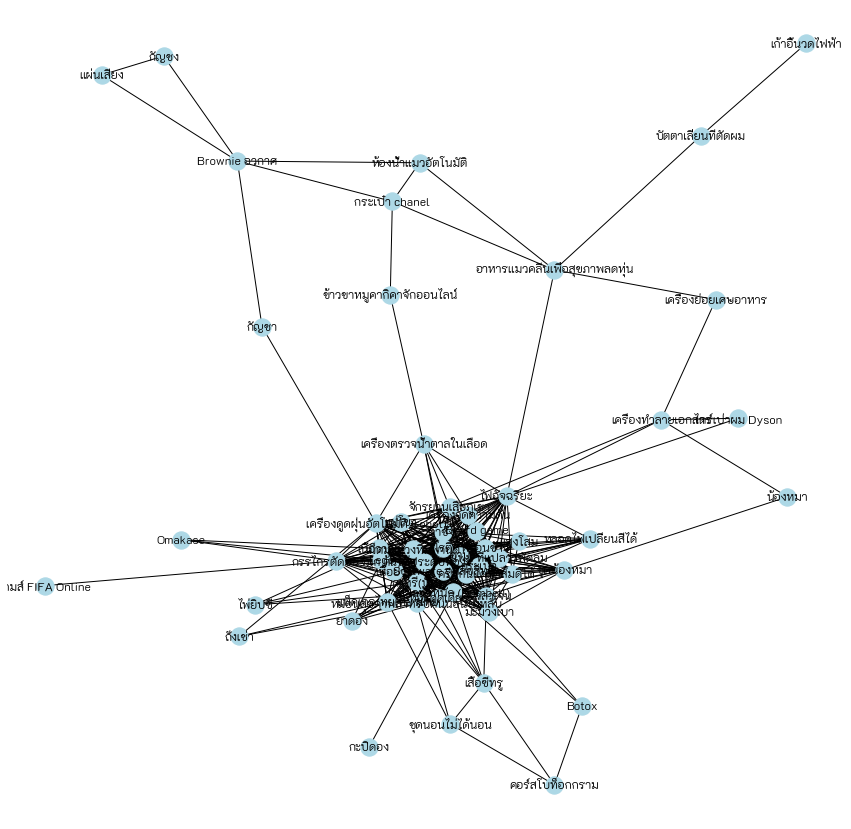

In [350]:
fig, ax=plt.subplots(figsize=(15,15))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,
        with_labels=True,
        font_family='K2D',
        node_color='lightblue')
plt.show()